# Neural Networks With TensorFlow
## Stable implementation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import variance_scaling_initializer # He-initializer
import matplotlib.pyplot as plt
from jupyter_tf_graph import show_graph

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

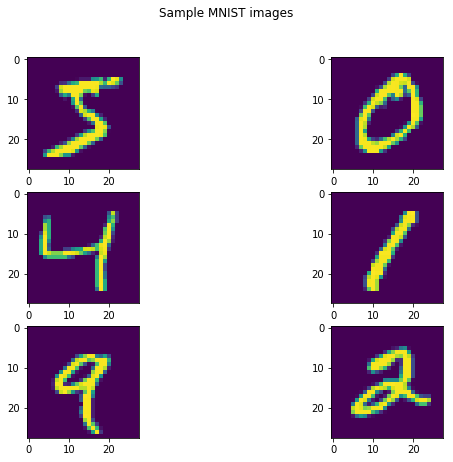

In [3]:
np.random.seed(1643)
img_ixs = np.random.randint(0, X_train.shape[0], 6)
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Sample MNIST images")
for ix, img_ixs in enumerate(img_ixs):
    ax = fig.add_subplot(3, 2, ix + 1)
    ax.imshow(X_train[ix].reshape(28, 28))

## Training a Fully Connected Deep Neural Network
### FFNN V.01
Feed forward neural network with sigmoid activation function and Gradient Descent Optimizer

In [67]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v01"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.sigmoid, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.sigmoid, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.sigmoid, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.sigmoid, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.sigmoid, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [68]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  40: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  80: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  120: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  160: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  200: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  240: Train Accuracy 009.87% | Test Accuracy 009.80%
@Epoch  280: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  320: Train Accuracy 011.24% | Test Accuracy 011.35%
@Epoch  360: Train Accuracy 011.24% | Test Accuracy 011.35%
CPU times: user 24min 36s, sys: 4min 15s, total: 28min 51s%
Wall time: 6min 50s


----
### FFNN V.02
Feed forward neural network with elu activation function and Gradient Descent Optimizer

In [69]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v02"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [70]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy], feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 006.13% | Test Accuracy 006.11%
@Epoch  40: Train Accuracy 009.70% | Test Accuracy 009.56%
@Epoch  80: Train Accuracy 014.78% | Test Accuracy 014.49%
@Epoch  120: Train Accuracy 021.02% | Test Accuracy 021.13%
@Epoch  160: Train Accuracy 027.68% | Test Accuracy 028.32%
@Epoch  200: Train Accuracy 033.88% | Test Accuracy 034.71%
@Epoch  240: Train Accuracy 039.29% | Test Accuracy 040.41%
@Epoch  280: Train Accuracy 043.42% | Test Accuracy 044.78%
@Epoch  320: Train Accuracy 047.05% | Test Accuracy 048.85%
@Epoch  360: Train Accuracy 050.14% | Test Accuracy 051.77%
CPU times: user 26min 10s, sys: 4min 11s, total: 30min 22s%
Wall time: 6min 56s


----
### FFNN V.03
Feed forward neural network with elu activation function and ADAM Optimizer

In [71]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v03"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.elu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.elu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden, activation=tf.nn.elu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden, activation=tf.nn.elu, name="hidden5")
    outputs = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=outputs
    )
    loss = tf.reduce_mean(xentropy, name="loss")
    

alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(outputs, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()

In [72]:
%%time
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                   feed_dict={X: X_test, y: y_test})
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch: 03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 025.93% | Test Accuracy 026.65%
@Epoch  40: Train Accuracy 091.63% | Test Accuracy 091.74%
@Epoch  80: Train Accuracy 094.57% | Test Accuracy 094.37%
@Epoch  120: Train Accuracy 096.32% | Test Accuracy 095.71%
@Epoch  160: Train Accuracy 097.35% | Test Accuracy 096.45%
@Epoch  200: Train Accuracy 098.10% | Test Accuracy 096.92%
@Epoch  240: Train Accuracy 098.75% | Test Accuracy 097.19%
@Epoch  280: Train Accuracy 098.96% | Test Accuracy 097.31%
@Epoch  320: Train Accuracy 099.46% | Test Accuracy 097.39%
@Epoch  360: Train Accuracy 099.69% | Test Accuracy 097.42%
CPU times: user 26min 11s, sys: 4min 17s, total: 30min 28s%
Wall time: 7min 14s


----
### FFNN V.04
Feed forward neural network with elu activation function, ADAM Optimizer and Batch Norm

In [88]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v04/"

n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

eta = 0.9
with tf.name_scope("dnn"):
    z1 = tf.layers.dense(X, n_hidden, name="z1")
    z1_bn = tf.layers.batch_normalization(z1, training=training, momentum=eta)
    a1 = tf.nn.elu(z1_bn)
    
    z2 = tf.layers.dense(a1, n_hidden, name="z2")
    z2_bn = tf.layers.batch_normalization(z2, training=training, momentum=eta)
    a2 = tf.nn.elu(z2_bn)
    
    z3 = tf.layers.dense(a2, n_hidden, name="z3")
    z3_bn = tf.layers.batch_normalization(z3, training=training, momentum=eta)
    a3 = tf.nn.elu(z3_bn)
    
    z4 = tf.layers.dense(a3, n_hidden, name="z4")
    z4_bn = tf.layers.batch_normalization(z4, training=training, momentum=eta)
    a4 = tf.nn.elu(z4)
    
    z5 = tf.layers.dense(a4, n_hidden, name="z5")
    z5_bn = tf.layers.batch_normalization(z5, training=training, momentum=eta)
    a5 = tf.nn.elu(z5_bn)
    
    output = tf.layers.dense(a5, n_hidden, name="output")


with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss)

    
with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()

In [89]:
%%time

# Operations to compute the mean and standard deviation of the minibatch
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_update_ops], feed_dict={training: True, X: X_train, y: y_train})
        acc, tb_acc = sess.run([accuracy, tb_accuracy],
                               feed_dict={X: X_train, y: y_train})
        cvacc, tb_cvacc = sess.run([accuracy, tb_accuracy],
                                    feed_dict={X: X_test, y: y_test})
        
        tb_train_writer.add_summary(tb_acc, epoch)
        tb_cv_writer.add_summary(tb_cvacc, epoch)
        
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)

@Epoch  00: Train Accuracy 005.91% | Test Accuracy 005.43%
@Epoch  40: Train Accuracy 091.78% | Test Accuracy 092.06%
@Epoch  80: Train Accuracy 095.16% | Test Accuracy 094.87%
@Epoch  120: Train Accuracy 096.90% | Test Accuracy 096.05%
@Epoch  160: Train Accuracy 097.95% | Test Accuracy 096.75%
@Epoch  200: Train Accuracy 098.79% | Test Accuracy 097.07%
@Epoch  240: Train Accuracy 099.32% | Test Accuracy 097.29%
@Epoch  280: Train Accuracy 099.68% | Test Accuracy 097.37%
@Epoch  320: Train Accuracy 099.87% | Test Accuracy 097.45%
@Epoch  360: Train Accuracy 099.95% | Test Accuracy 097.43%
CPU times: user 47min 35s, sys: 6min 25s, total: 54min7.43%
Wall time: 10min 52s


## Feed Forward Neural Network Version Comparison
![FFNNs Comparisson](./images/ffnn_vs.png)

----
----
# Storing and Reusing TF Models

In [4]:
from functools import partial

def a_plus_b(a, b): return a + b
a_plus_3 = partial(a_plus_b, b=3)
a_plus_3(5)

8

## 1) Building and Storing the model

In [30]:
tf.reset_default_graph()

logs = "./tf_logs/ffnn_v05/"

n_inputs = 28 * 28
n_hidden = 100
n_output = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=None, name="y")

training = tf.placeholder_with_default(False, shape=(), name="training_bool")

eta = 0.9
batch_norm = partial(tf.layers.batch_normalization,
                     momentum=eta, training=training)

def hidden_layer(inputs, units, hi, activation=tf.nn.elu):
    """
    Create the hidden layer of a feed forward neural
    network with batch norm.
    """
    zi = tf.layers.dense(inputs, units, name=f"z{hi}")
    zi_bn = batch_norm(zi, name=f"z_bn{hi}")
    ai = activation(zi_bn, name=f"a{hi}")
    
    return ai


with tf.name_scope("dnn"):
    hidden = hidden_layer(X, n_hidden, 1)
    # Creating 5 ELU layers
    for h_ix in range(2, 6):
        hidden = hidden_layer(hidden, n_hidden, h_ix)
    output = tf.layers.dense(hidden, n_output, name="output")
    

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output
    )
    loss = tf.reduce_mean(xentropy, name="loss")

    
alpha = 0.005
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    tb_train_writer = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    tb_cv_writer = tf.summary.FileWriter(logs + "/cv", tf.get_default_graph())
    tb_acc = tf.summary.scalar("Accuracy", accuracy)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
# Operations to compute the running mean and variance.
# ----------------------------------------------------
# In general, *tf.GraphKeys*, is a collection of names
# to collect and retrieve values associated with a graph
extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
model_path = "tfmodels/ffnn_v05.ckpt"
epochs = 400
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run([train_step, extra_ops], feed_dict={X: X_train, y: y_train,
                                                     training: True})
        acc, bn_train_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_train, y:y_train})
        cvacc, bn_cv_acc = sess.run([accuracy, tb_acc], feed_dict={X: X_test, y:y_test})
        tb_train_writer.add_summary(bn_train_acc, epoch)
        tb_cv_writer.add_summary(bn_cv_acc, epoch)
        end = "\n" if epoch % 40 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    saver.save(sess, model_path)

@Epoch 000: Train Accuracy 043.06% | Test Accuracy 043.12%
@Epoch 040: Train Accuracy 096.41% | Test Accuracy 095.82%
@Epoch 080: Train Accuracy 098.79% | Test Accuracy 097.35%
@Epoch 120: Train Accuracy 098.74% | Test Accuracy 097.15%
@Epoch 160: Train Accuracy 099.95% | Test Accuracy 097.65%
@Epoch 200: Train Accuracy 100.00% | Test Accuracy 097.68%
@Epoch 240: Train Accuracy 100.00% | Test Accuracy 097.77%
@Epoch 280: Train Accuracy 100.00% | Test Accuracy 097.81%
@Epoch 320: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 360: Train Accuracy 100.00% | Test Accuracy 097.85%


## 2) Restoring the model

In [32]:
tf.reset_default_graph()

model = tf.train.import_meta_graph("./tfmodels/ffnn_v05.ckpt.meta")
new_model = tf.train.Saver()
new_model_path = "./tfmodels/ffnn_v05_1.ckpt"

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
training = tf.get_default_graph().get_tensor_by_name("training_bool:0")
accuracy = tf.get_default_graph().get_tensor_by_name("metrics/accuracy:0")
train_step = tf.get_default_graph().get_operation_by_name("train/train_step")

init = tf.global_variables_initializer()
bn_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
epochs = 40
with tf.Session() as sess:
    sess.run(init)
    model.restore(sess, "./tfmodels/ffnn_v05.ckpt")
    for epoch in range(epochs):
        sess.run([train_step, bn_ops], feed_dict={X: X_train, y: y_train,
                                                  training: True})
        acc = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
        cvacc = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
        end = "\n" if epoch % 10 == 0 else "\r"
        print(f"@Epoch {epoch:03}: Train Accuracy {acc:07.2%} | Test Accuracy {cvacc:07.2%}",
              end=end)
    new_model.save(sess, new_model_path)

INFO:tensorflow:Restoring parameters from ./tfmodels/ffnn_v05.ckpt
@Epoch 000: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 010: Train Accuracy 100.00% | Test Accuracy 097.84%
@Epoch 020: Train Accuracy 100.00% | Test Accuracy 097.83%
@Epoch 030: Train Accuracy 100.00% | Test Accuracy 097.83%


----
----
# Transfer Learning

In [50]:
from numpy.random import choice, seed
from functools import partial
from math import ceil

In [8]:
map_train_0_4 = y_train < 5
y_0_4_train = y_train[map_train_0_4] 
X_0_4_train = X_train[map_train_0_4,:]

map_test_0_4 = y_test < 5
y_0_4_test = y_test[map_test_0_4]
X_0_4_test = X_test[map_test_0_4, :]

### Deep Learning V.01
We being by training a feed-forward neural network with 5 hidden layers, elu activation function and he initializiation. In order to train this NNet, we consider Adam optimization and early stopping.

For educational purposes, we will consider the test-set as the validation set. Early stopping will kick in once the accuracy on the validation (test) set at epoch $t$ drops below the accuracy at epoch $t-1$.

In [8]:
tf.reset_default_graph()
logs = "./tf_logs/transfer/ffnn_0_4"

n_inputs = 28 * 28
n_hidden = 100
n_output = 5

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
he_init = variance_scaling_initializer()

hidden_layer = partial(tf.layers.dense, units=n_hidden,
                       activation=tf.nn.elu,
                       kernel_initializer=he_init)

with tf.name_scope("DNN"):
    for hi in range(1, 6):
        if hi == 1:
            hidden = hidden_layer(inputs=X, name=f"hidden_{hi}")
        else:
            hidden = hidden_layer(inputs=hidden, name=f"hidden_{hi}")

    output = hidden_layer(inputs=hidden, units=n_output,
                          activation=None, name="output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=output)
    loss = tf.reduce_mean(xentropy, name="loss")


alpha = 0.001
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(alpha)
    train_step = optimizer.minimize(loss, name="train_step")


with tf.name_scope("metrics"):
    correct = tf.nn.in_top_k(output, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    ### Writer Configuration ###
    writer_train = tf.summary.FileWriter(logs + "/train", tf.get_default_graph())
    writer_test = tf.summary.FileWriter(logs + "/test", tf.get_default_graph())
    writer_accuracy = tf.summary.scalar("Accuracy", accuracy)

init = tf.global_variables_initializer()
model_saver = tf.train.Saver()

In [9]:
epochs = 400
current_test_loss = 10 ** 10
max_stag_threshold = 20
current_stag = 0
mean_stag_val = 0

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_step, feed_dict={X: X_0_4_train, y: y_0_4_train})
        train_acc, writer_train_acc = sess.run([accuracy, writer_accuracy],
                                               feed_dict={X: X_0_4_train, y: y_0_4_train})
        test_acc, writer_test_acc = sess.run([accuracy, writer_accuracy],
                                              feed_dict={X: X_0_4_test, y: y_0_4_test})
        
        test_loss = sess.run(loss, feed_dict={X: X_0_4_test, y: y_0_4_test})
        # Add elements to summary
        writer_test.add_summary(writer_test_acc, global_step=epoch)
        writer_train.add_summary(writer_train_acc, global_step=epoch)
        # We consider an stagnation if, for 20 steps, the test set does not
        # move either way more than 2% from the current value
        delta_test_loss = abs(test_loss / current_test_loss - 1)
        if delta_test_loss < 0.01 or test_loss > current_test_loss:
            if current_stag >= max_stag_threshold:
                print(f"Early Stopping...\nThe loss change rate was of {mean_stag_val / max_stag_threshold:0.5%}")
                break
            else:
                current_stag += 1
                mean_stag_val += delta_test_loss
                end = "\n" if current_stag > 10 else "\r"
                print((f"Epoch @{epoch:03} Train Acc: {train_acc:07.02%} "
                       f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                       f"| Test loss: {test_loss:08.3%} | Stag: {'*' * ceil(current_stag / 2)}"), end=end)
        else:
            current_stag = 0
            mean_stag_val = 0
            end = "\n" if epoch % 20 == 0 else "\r"
            print((f"Epoch @{epoch:03} Train Acc: {train_acc:07.02%} "
                   f"| Test Acc: {test_acc:07.02%} | ∆%: {delta_test_loss:09.4%} "
                   f"| Test loss: {test_loss:08.3%} |"), end=end)
            current_test_loss = test_loss

    model_saver.save(sess, "./tfmodels/nnet_0_4_v01.ckpt")

Epoch @000 Train Acc: 063.78% | Test Acc: 062.87% | ∆%: 100.0000% | Test loss: 147.022% |
Epoch @020 Train Acc: 095.47% | Test Acc: 096.26% | ∆%: 003.2442% | Test loss: 012.223% |
Epoch @040 Train Acc: 097.14% | Test Acc: 097.65% | ∆%: 001.2901% | Test loss: 007.678% |
Epoch @060 Train Acc: 097.72% | Test Acc: 098.03% | ∆%: 001.3796% | Test loss: 006.510% | Stag: *
Epoch @080 Train Acc: 098.10% | Test Acc: 098.15% | ∆%: 001.0023% | Test loss: 005.961% | Stag: *
Epoch @188 Train Acc: 099.42% | Test Acc: 098.74% | ∆%: 017.4311% | Test loss: 004.557% | Stag: ******
Epoch @200 Train Acc: 099.66% | Test Acc: 098.87% | ∆%: 003.8576% | Test loss: 003.959% | Stag: ******
Epoch @201 Train Acc: 099.59% | Test Acc: 098.85% | ∆%: 009.2648% | Test loss: 004.165% | Stag: ******
Epoch @202 Train Acc: 099.68% | Test Acc: 098.87% | ∆%: 000.8255% | Test loss: 003.844% | Stag: *******
Epoch @203 Train Acc: 099.65% | Test Acc: 098.95% | ∆%: 000.1273% | Test loss: 003.817% | Stag: *******
Epoch @204 Train 

### Deep Learning V.02
In order to find a better preforming 5-layer Deep Neural Network, we proceed by creating a `DNN` class with homogeneous number of neurons in each of the hidden layers. We will make use of use of `BaseEstimator` and `ClassifierMixin` in order to cross-validate the performance and pick a better model.

**NOTE:** This implementation does not take into account a batch size in order to fit the model. This simple class is to be used with training data that fits into memory. (See [tf.data](https://www.tensorflow.org/programmers_guide/datasets) for an optimized way to fit models in TensorFlow via batch-GD)

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

In [13]:
map_train_0_4 = y_train < 5
y_0_4_train = y_train[map_train_0_4] 
X_0_4_train = X_train[map_train_0_4,:]

y_0_4_cv, y_0_4_train = y_0_4_train[:5000], y_0_4_train[5000:]
X_0_4_cv, X_0_4_train = X_0_4_train[:5000], X_0_4_train[5000:]

map_test_0_4 = y_test < 5
y_0_4_test = y_test[map_test_0_4]
X_0_4_test = X_test[map_test_0_4, :]

In [69]:
class DnnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=5, n_neurons=100, optimizer=tf.train.AdamOptimizer,
                 learning_rate=0.01, activation_fn=tf.nn.elu,
                 initializer=tf.variance_scaling_initializer(),
                 bn_momentum=None, dropout_rate=None, seed_state=None):
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.activation_fn = activation_fn
        self.initializer = initializer # default He-initializiation
        self.bn_momentum = bn_momentum
        self.dropout_rate = dropout_rate
        self.seed_state = seed_state
        self._session = None
    
    def _dnn(self, inputs):
        """
        Build hidden layers with optional support for batch normalization and dropout
        """
        for hi in range(self.n_hidden):
            # Dropout is applied *after* the activation function,
            # if it is not None, this first step is applying dropout
            # to the last seen layer (X being the first 'input' layer)
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, rate=self.dropout_rate, training=self._training)
                
            inputs = tf.layers.dense(inputs, self.n_neurons, activation=self.activation_fn,
                                     kernel_initializer=self.initializer,
                                     name=f"z_{hi + 1}")
            
            if self.bn_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.bn_momentum,
                                                       training=self._training)
            inputs = self.activation_fn(inputs, name=f"a_{hi + 1}")
        
        return inputs
    
    def _build_graph(self, n_inputs, n_outputs):
        y = tf.placeholder(tf.int32, shape=(None), name="y")
        
        if self.bn_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name="training") 
        else:
            self._training = None
            
        with tf.name_scope("DNN"):
            X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
            final_hidden_layer = self._dnn(X)
            logits = tf.layers.dense(final_hidden_layer, n_outputs,
                                     kernel_initializer=self.initializer,
                                     name="logits")
            y_proba = tf.nn.softmax(logits, name="y_proba")
            
        with tf.name_scope("loss"):
            xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits,
                labels=y)
            loss = tf.reduce_mean(xentropy, name="loss")
            
        with tf.name_scope("train"):
            optimizer = self.optimizer(self.learning_rate)
            train_step = optimizer.minimize(loss, name="train_step")
            
        with tf.name_scope("metrics"):
            correct = tf.nn.in_top_k(logits, y, 1)
            accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()
        
        self._X = X
        self._y = y
        self._y_proba = y_proba
        self._loss = loss
        self._train_step = train_step
        self._accuracy = accuracy
        self._init = init
        self._saver = saver
        
    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_parameters(self):
        """
        Get all variable parameters
        """
        with self._graph.as_default():
            glob_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        
        return {glob_var.op.name: value for glob_var, value
                in zip(glob_vars, self._session.run(glob_vars))}
    
    def _restore_model_parameters(self, model_params):
        glob_vars_names = list(model_params.keys())
        assign_ops = {
            glob_var_name: self._graph.get_operation_by_name(glob_var_name + "/Assign")
            for glob_var_name in glob_vars_names
        }
        init_values = {gvar_name: assign_op.inputs[1]
                       for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[glob_var_name]: model_params[glob_var_name]
                     for glob_var_name in glob_vars_names}
        
        self._session.run(assign_ops, feed_dict=feed_dict)
        
    def fit(self, X, y, epochs, X_cv=None, y_cv=None):
        self.close_session()
        
        self.classes_ = np.unique(y) # Retrieve unique indices and sort
        n_inputs = X.shape[1]
        n_outputs = len(self.classes_)
        
        # Convert labels to a sorted index from 0 to n_classes - 1
        self.class_to_index_ = {label: index for label, index
                                in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label] for label in y],
                     dtype=np.int32)
        
        # ******** Early Stopping utility parameters ********
        max_epochs_without_progress = 20
        epochs_without_progress = 0
        best_loss = np.infty
        best_params = None
                
        # Defining the graph inside the class.
        # By calling the _build_graph method
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # Extra operations for batch normalization (if needed)
            extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            sess.run(self._init)
            for epoch in range(epochs):
                # Creating the Feed-Dict dictionary
                feed_dict = {self._X: X, self._y: y}                
                if self._training is not None:
                    feed_dict[self._training] = True
                
                if self.bn_momentum is not None:
                    sess.run([self._train_step, extra_ops], feed_dict=feed_dict)
                else:
                    sess.run(self._train_step, feed_dict=feed_dict)
                    
                end = "\n" if epoch % (epochs // 10) == 0 else "\r"
                if X_cv is not None and y_cv is not None:
                    loss_cv, acc_cv = sess.run([self._loss, self._accuracy],
                                               feed_dict={self._X: X_cv, self._y: y_cv})
                    if loss_cv < best_loss:
                        best_params = self._get_model_parameters()
                        best_loss = loss_cv
                        epochs_without_progress = 0
                    else:
                        epochs_without_progress += 1
                    
                    print((f"@E{epoch}\tCV Loss: {loss_cv:0.3f}\tCV Acc: {acc_cv:0.3%}"
                           f"\tEWP:{epochs_without_progress:02}"), end=end)
                    
                    if epochs_without_progress > max_epochs_without_progress:
                        print("\n\n...Early Stopping")
                        break
                    
                else:
                    acc_train = sess.run(self._accuracy, feed_dict)
                    print(f"@E{epoch}, training accuracy: {acc_train:07.3%}",
                          end=end)
            
            # If early stopping was used, rollback to the best model found
            if best_params is not None:
                self._restore_model_parameters(best_params)
            
            return self
        
    def predict_proba(self, X):
        if self._session is None:
            raise NotFittedError(f"This {self.__class__.__name__} instance is not fitted yet")

        with self._session.as_default() as sess:
            y_proba_result = sess.run(self._y_proba, feed_dict={self._X: X})

        return y_proba_result

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([self.classes_[label] for label in class_indices],
                        dtype=np.int32)

    def save(self, path):
        self._saver(self._session, path)

In [70]:
dnn01 = DnnClassifier()
dnn01.fit(X_0_4_train, y_0_4_train, 400, X_0_4_cv, y_0_4_cv)

@E0	CV Loss: 1.300	CV Acc: 51.540%	EWP:00
@E40	CV Loss: 0.071	CV Acc: 97.840%	EWP:00
@E80	CV Loss: 0.059	CV Acc: 98.380%	EWP:03
@E111	CV Loss: 0.064	CV Acc: 98.360%	EWP:21

...Early Stopping


DnnClassifier(activation_fn=<function elu at 0x11206bf28>, bn_momentum=None,
       dropout_rate=None,
       initializer=<tensorflow.python.ops.init_ops.VarianceScaling object at 0x184c627cf8>,
       learning_rate=0.01, n_hidden=5, n_neurons=100,
       optimizer=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       seed_state=None)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_0_4_test, dnn01.predict(X_0_4_test))

0.989492119089317

In [74]:
from sklearn.model_selection import RandomizedSearchCV

choser_params = {
    "n_hidden": [5, 7, 11, 13],
    "n_neurons": [50, 100, 200, 250, 300],
    "learning_rate": [0.1, 0.001, 0.005, 0.0001],
    "activation_fn": [tf.nn.elu, tf.nn.relu],
    "dropout_rate": [0.2, 0.3, 0.4, 0.5, 0.6]
}

dnn02 = RandomizedSearchCV(DnnClassifier(), choser_params, verbose=2)
dnn02.fit(X_0_4_train, y_0_4_train, **{"X_cv": X_0_4_cv, "y_cv": y_0_4_cv,  "epochs":1500})

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08> 
@E0	CV Loss: 1.606	CV Acc: 22.960%	EWP:00
@E150	CV Loss: 0.342	CV Acc: 78.420%	EWP:00
@E300	CV Loss: 0.095	CV Acc: 97.700%	EWP:01
@E320	CV Loss: 0.097	CV Acc: 97.740%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08>, total= 1.4min
[CV] n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08> 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


@E0	CV Loss: 1.609	CV Acc: 22.080%	EWP:00
@E150	CV Loss: 0.394	CV Acc: 77.300%	EWP:00
@E260	CV Loss: 0.358	CV Acc: 78.480%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08>, total= 1.2min
[CV] n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08> 
@E0	CV Loss: 1.606	CV Acc: 32.160%	EWP:00
@E150	CV Loss: 0.363	CV Acc: 78.720%	EWP:00
@E300	CV Loss: 0.089	CV Acc: 97.740%	EWP:05
@E411	CV Loss: 0.075	CV Acc: 98.080%	EWP:21

...Early Stopping
[CV]  n_neurons=50, n_hidden=7, learning_rate=0.001, dropout_rate=0.4, activation_fn=<function relu at 0x112085d08>, total= 1.9min
[CV] n_neurons=200, n_hidden=11, learning_rate=0.1, dropout_rate=0.2, activation_fn=<function relu at 0x112085d08> 
@E0	CV Loss: 243379632.000	CV Acc: 19.380%	EWP:00
@E108	CV Loss: 1.608	CV Acc: 22.020%	EWP:21

...Early Stopping
[CV]  n_neurons=200, n_hidden=11, learning_rate=0.1

@E750	CV Loss: 0.153	CV Acc: 96.720%	EWP:14
@E900	CV Loss: 0.137	CV Acc: 97.140%	EWP:20
@E901	CV Loss: 0.137	CV Acc: 97.160%	EWP:21

...Early Stopping
[CV]  n_neurons=250, n_hidden=7, learning_rate=0.0001, dropout_rate=0.6, activation_fn=<function relu at 0x112085d08>, total=15.8min
[CV] n_neurons=250, n_hidden=7, learning_rate=0.0001, dropout_rate=0.6, activation_fn=<function relu at 0x112085d08> 
@E0	CV Loss: 1.609	CV Acc: 24.220%	EWP:00
@E150	CV Loss: 1.305	CV Acc: 42.760%	EWP:00
@E300	CV Loss: 0.496	CV Acc: 89.080%	EWP:00
@E450	CV Loss: 0.207	CV Acc: 94.880%	EWP:00
@E600	CV Loss: 0.162	CV Acc: 96.400%	EWP:00
@E653	CV Loss: 0.157	CV Acc: 96.700%	EWP:21

...Early Stopping
[CV]  n_neurons=250, n_hidden=7, learning_rate=0.0001, dropout_rate=0.6, activation_fn=<function relu at 0x112085d08>, total=11.9min
[CV] n_neurons=250, n_hidden=7, learning_rate=0.0001, dropout_rate=0.6, activation_fn=<function relu at 0x112085d08> 
@E0	CV Loss: 1.609	CV Acc: 20.180%	EWP:00
@E150	CV Loss: 1.331	CV 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 151.4min finished


@E0	CV Loss: 1.298	CV Acc: 78.780%	EWP:00
@E150	CV Loss: 0.044	CV Acc: 98.760%	EWP:02
@E201	CV Loss: 0.038	CV Acc: 98.900%	EWP:21

...Early Stopping


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DnnClassifier(activation_fn=<function elu at 0x11206bf28>, bn_momentum=None,
       dropout_rate=None,
       initializer=<tensorflow.python.ops.init_ops.VarianceScaling object at 0x184c627cf8>,
       learning_rate=0.01, n_hidden=5, n_neurons=100,
       optimizer=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       seed_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_hidden': [5, 7, 11, 13], 'n_neurons': [50, 100, 200, 250, 300], 'learning_rate': [0.1, 0.001, 0.005, 0.0001], 'activation_fn': [<function elu at 0x11206bf28>, <function relu at 0x112085d08>], 'dropout_rate': [0.2, 0.3, 0.4, 0.5, 0.6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)